# Day 8 - Lab 1: Vision-Enabled UI/UX Agents

**Objective:** Use multi-modal vision models to generate a frontend UI from a design image, and then use a second agent to perform an automated design review.

**Estimated Time:** 90 minutes

**Introduction:**
Welcome to Day 8! Today, we'll explore one of the most exciting advancements in AI: vision. We will use a vision-capable model to act as a frontend developer, translating a design image directly into code. Then, we will create a second "UI/UX Critic" agent to automate the design review process, demonstrating a complete, AI-assisted frontend workflow.

For definitions of key terms used in this lab, please refer to the [GLOSSARY.md](../../GLOSSARY.md).

## Step 1: Setup

For this lab, we need to ensure we are using a vision-capable model. We will configure our `utils.py` helper to use a model like OpenAI's `gpt-4o` or Google's `gemini-2.5-pro`.

**Model Selection:**
This lab requires a vision-capable model. Excellent choices include `gpt-4o`, `gemini-2.5-pro`, or `deepseek-ai/DeepSeek-VL2`.

**Helper Functions Used:**
- `setup_llm_client()`: To configure the API client.
- `get_vision_completion()`: A specialized function to send an image and a text prompt to a vision model.
- `get_completion()`: To send text-only prompts for the refactoring step.
- `save_artifact()`: To save the generated code and the design review.

In [ ]:
import sys
import os

# Add the project's root directory to the Python path
try:
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
except IndexError:
    project_root = os.path.abspath(os.path.join(os.getcwd()))

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from utils import setup_llm_client, get_vision_completion, get_image_generation_completion, get_completion, save_artifact, clean_llm_output, recommended_models_table, prompt_enhancer, load_artifact
from IPython.display import Image, display, Code

image_client, image_model_name, image_api_provider = setup_llm_client(model_name="stabilityai/stable-diffusion-3.5-large")
print(f"✅ Using {image_model_name} for image generation")

# Ensure you select a vision-capable model
vision_client, vision_model_name, vision_api_provider = setup_llm_client(model_name="gpt-4.1")
print(f"✅ Using {vision_model_name} for vision tasks")

if not image_model_name or not vision_model_name:
    print("Could not set up a valid LLM client. Please check your .env file and utils.py configuration.")

app_prd = load_artifact("fictional-waffle/artifacts/waffle_PRD_output_from_Template.md")
app_sch = load_artifact("fictional-waffle/artifacts/waffle_schema.sql")

2025-10-02 13:50:41,469 ag_aisoftdev.utils INFO LLM Client configured provider=huggingface model=stabilityai/stable-diffusion-3.5-large latency_ms=None artifacts_path=None


✅ Using stabilityai/stable-diffusion-3.5-large for image generation


2025-10-02 13:50:41,847 ag_aisoftdev.utils INFO LLM Client configured provider=openai model=gpt-4.1 latency_ms=None artifacts_path=None


✅ Using gpt-4.1 for vision tasks


ArtifactSecurityError: Resolved path 'C:\Users\labadmin\AG-AISOFTDEV\fictional-waffle\artifacts\waffle_PRD_output_from_Template.md' escapes artifacts dir 'C:\Users\labadmin\AG-AISOFTDEV\artifacts'.

In [11]:
recommended_models_table()

| Model | Provider | Text | Vision | Image Gen | Image Edit | Audio Transcription | Context Window | Max Output Tokens |
|---|---|---|---|---|---|---|---|---|
| Qwen/Qwen-Image | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| Qwen/Qwen-Image-Edit | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |
| black-forest-labs/FLUX.1-Kontext-dev | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |
| claude-opus-4-1-20250805 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| claude-opus-4-20250514 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| claude-sonnet-4-20250514 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 100,000 |
| dall-e-3 | openai | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| deepseek-ai/DeepSeek-V3.1 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 128,000 | 100,000 |
| gemini-1.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 8,192 |
| gemini-1.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 2,000,000 | 8,192 |
| gemini-2.0-flash-exp | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 8,192 |
| gemini-2.0-flash-preview-image-generation | google | ❌ | ❌ | ✅ | ✅ | ❌ | 32,000 | 8,192 |
| gemini-2.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-2.5-flash-image-preview | google | ❌ | ❌ | ✅ | ✅ | ❌ | 32,768 | 32,768 |
| gemini-2.5-flash-lite | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-2.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-live-2.5-flash-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,048,576 | 8,192 |
| gpt-4.1 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,768 |
| gpt-4.1-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,000 |
| gpt-4.1-nano | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,000 |
| gpt-4o | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 128,000 | 16,384 |
| gpt-4o-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 128,000 | 16,384 |
| gpt-5-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| gpt-5-mini-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| gpt-5-nano-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| meta-llama/Llama-3.3-70B-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 8,192 | 4,096 |
| meta-llama/Llama-4-Maverick-17B-128E-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 1,000,000 | 100,000 |
| meta-llama/Llama-4-Scout-17B-16E-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 10,000,000 | 100,000 |
| mistralai/Mistral-7B-Instruct-v0.3 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 32,768 | 8,192 |
| o3 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| o4-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| stabilityai/stable-diffusion-3.5-large | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| tokyotech-llm/Llama-3.1-Swallow-8B-Instruct-v0.5 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 4,096 | 1,024 |
| veo-3.0-fast-generate-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,024 | - |
| veo-3.0-generate-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,024 | - |
| whisper-1 | openai | ❌ | ❌ | ❌ | ❌ | ✅ | - | - |

'| Model | Provider | Text | Vision | Image Gen | Image Edit | Audio Transcription | Context Window | Max Output Tokens |\n|---|---|---|---|---|---|---|---|---|\n| Qwen/Qwen-Image | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |\n| Qwen/Qwen-Image-Edit | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |\n| black-forest-labs/FLUX.1-Kontext-dev | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |\n| claude-opus-4-1-20250805 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |\n| claude-opus-4-20250514 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |\n| claude-sonnet-4-20250514 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 100,000 |\n| dall-e-3 | openai | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |\n| deepseek-ai/DeepSeek-V3.1 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 128,000 | 100,000 |\n| gemini-1.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 8,192 |\n| gemini-1.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 2,000,000 | 8,192 |\n| gemini-2.0-flash-exp | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 8,192 |\n| gemini-2.0-flash-preview

## Step 2: The Design Screenshot

This is the design we want our AI agent to build. It's a simple login form component. We will provide the URL to this image directly to the model.

2025-10-02 13:20:17,076 ag_aisoftdev.utils INFO LLM Client configured provider=openai model=o3 latency_ms=None artifacts_path=None


Using stabilityai/stable-diffusion-3.5-large for image generation...
✅ Generated image saved to: C:\Users\labadmin\AG-AISOFTDEV\artifacts\screens\image_1759425655.png



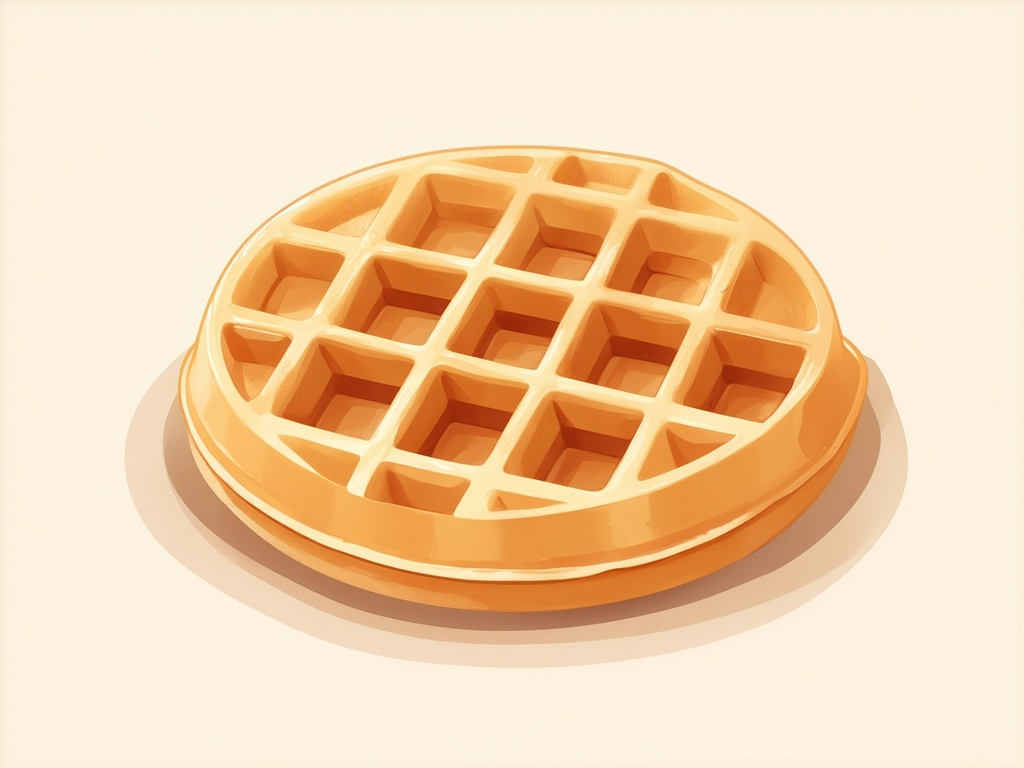

In [ ]:
# Generate a website homepage screen image

# screen_generation_prompt = f"Create an image of a website for an onboarding tool homepage screen with \
    # modern UI design, clean layout, welcome message, and navigation elements. Use the following PRD and \
    # schema as context: {app_prd} {app_sch}"

screen_generation_prompt = prompt_enhancer(screen_generation_prompt)

print(f"Using {image_model_name} for image generation...")
file_path, image_url = get_image_generation_completion(screen_generation_prompt, image_client, image_model_name, image_api_provider)

# Display the generated image if successful
if file_path and image_url:
    print(f"✅ Generated image saved to: {file_path}")
    display(Image(url=image_url))
elif image_url:
    print(f"❌ Image generation failed: {image_url}")
else:
    print("❌ Image generation returned no result")

In [15]:
recommended_models_table()

| Model | Provider | Text | Vision | Image Gen | Image Edit | Audio Transcription | Context Window | Max Output Tokens |
|---|---|---|---|---|---|---|---|---|
| Qwen/Qwen-Image | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| Qwen/Qwen-Image-Edit | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |
| black-forest-labs/FLUX.1-Kontext-dev | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |
| claude-opus-4-1-20250805 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| claude-opus-4-20250514 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| claude-sonnet-4-20250514 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 100,000 |
| dall-e-3 | openai | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| deepseek-ai/DeepSeek-V3.1 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 128,000 | 100,000 |
| gemini-1.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 8,192 |
| gemini-1.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 2,000,000 | 8,192 |
| gemini-2.0-flash-exp | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 8,192 |
| gemini-2.0-flash-preview-image-generation | google | ❌ | ❌ | ✅ | ✅ | ❌ | 32,000 | 8,192 |
| gemini-2.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-2.5-flash-image-preview | google | ❌ | ❌ | ✅ | ✅ | ❌ | 32,768 | 32,768 |
| gemini-2.5-flash-lite | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-2.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-live-2.5-flash-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,048,576 | 8,192 |
| gpt-4.1 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,768 |
| gpt-4.1-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,000 |
| gpt-4.1-nano | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,000 |
| gpt-4o | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 128,000 | 16,384 |
| gpt-4o-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 128,000 | 16,384 |
| gpt-5-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| gpt-5-mini-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| gpt-5-nano-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| meta-llama/Llama-3.3-70B-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 8,192 | 4,096 |
| meta-llama/Llama-4-Maverick-17B-128E-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 1,000,000 | 100,000 |
| meta-llama/Llama-4-Scout-17B-16E-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 10,000,000 | 100,000 |
| mistralai/Mistral-7B-Instruct-v0.3 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 32,768 | 8,192 |
| o3 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| o4-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| stabilityai/stable-diffusion-3.5-large | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| tokyotech-llm/Llama-3.1-Swallow-8B-Instruct-v0.5 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 4,096 | 1,024 |
| veo-3.0-fast-generate-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,024 | - |
| veo-3.0-generate-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,024 | - |
| whisper-1 | openai | ❌ | ❌ | ❌ | ❌ | ✅ | - | - |

'| Model | Provider | Text | Vision | Image Gen | Image Edit | Audio Transcription | Context Window | Max Output Tokens |\n|---|---|---|---|---|---|---|---|---|\n| Qwen/Qwen-Image | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |\n| Qwen/Qwen-Image-Edit | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |\n| black-forest-labs/FLUX.1-Kontext-dev | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |\n| claude-opus-4-1-20250805 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |\n| claude-opus-4-20250514 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |\n| claude-sonnet-4-20250514 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 100,000 |\n| dall-e-3 | openai | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |\n| deepseek-ai/DeepSeek-V3.1 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 128,000 | 100,000 |\n| gemini-1.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 8,192 |\n| gemini-1.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 2,000,000 | 8,192 |\n| gemini-2.0-flash-exp | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 8,192 |\n| gemini-2.0-flash-preview

In [17]:
#login_form_url = "https://i.imgur.com/s42SYz6.png"
#display(Image(url=login_form_url))

## Step 3: The Challenges

### Challenge 1 (Foundational): Generating a Monolithic UI Component

**Task:** Use the vision model to generate a single, self-contained React component that replicates the design from the image.

> **Tip for Vision Prompts:** Be specific about the output format. Telling the model you want 'React' and 'Tailwind CSS' is crucial. The more specific your technical constraints, the better the generated code will be.

**Instructions:**
1.  Create a prompt that asks the vision model to act as an expert frontend developer.
2.  The prompt should instruct the model to analyze the image at the provided URL.
3.  Ask it to generate a single React component using Tailwind CSS for styling.
4.  The output should be a single block of JSX code.

**Expected Quality:** A single file's worth of React code that, when rendered, visually approximates the login form in the screenshot.

In [22]:
# Explain the specified image using the vision-capable LLM
image_path = "C:/Users/labadmin/AG-AISOFTDEV/artifacts/screens/image_1759244979.png"

explain_image_prompt = """You are an expert frontend developer and UI/UX designer. Analyze the provided
    image and create a detailed explanation of the UI design, layout, and components present in the image.
    The explanation should be structured in markdown format with the following sections: 

    1) Summary: One-sentence summary of what this screen is (purpose).
    2) Visual Breakdown: Enumerate the visible UI elements (e.g., header, logo, form fields, buttons, icons, images) and approximate positions (top/left/center, grouping).
    3) Style Details: Describe colors, font styles (weight/size/line-height if evident), spacing, borders/radii, shadows, and alignment cues.
    4) Interaction & Behavior: Identify interactive elements and the likely behaviors (hover/focus states, validation, keyboard affordances).
    5) Accessibility Notes: Potential accessibility issues and recommended fixes (labels, contrast, focus order).
    6) Implementation Plan (React + Tailwind): Suggest component names and a short mapping of each component to Tailwind utilities or structure (e.g., <LoginForm> -> container: flex, gap-4, ...). Keep this as a concise checklist.

    Keep the output developer-focused and actionable.
"""
explain_image_prompt = prompt_enhancer(explain_image_prompt)

print("--- Requesting image explanation from vision model ---")
if vision_model_name:
    explanation = get_vision_completion(explain_image_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_explanation = clean_llm_output(explanation, language="markdown")
    display(Code(cleaned_explanation, language="markdown"))
    # Save the explanation for later reference
    save_artifact(cleaned_explanation, "artifacts/image_explanation.md", overwrite=True)
else:
    print("Skipping image explanation because no vision model is configured.")

2025-09-30 11:56:17,318 ag_aisoftdev.utils INFO LLM Client configured provider=openai model=o3 latency_ms=None artifacts_path=None


--- Requesting image explanation from vision model ---


### Summary
Employee onboarding dashboard featuring user info, onboarding progress, tasks, and quick context/help. Primary focus on clarity and accessibility for new hires.

### Visual Breakdown
• (Top-Center Overlay) User profile card with photo and summary  
• (Top-Center Overlay) Notification/toast panel showing a personal task with progress  
• (Top-Left) Hamburger menu icon  
• (Top-Right) Settings/profile icon button  
• (Header, Center) Section label ("Smart Onboarding:") with supporting subtitle  
• (Header, Center-Right) Step indicator/nav ("Personal & Design")
• (Main – Below Header, Left) Primary onboarding step card  
• (Main – Card Row, Center) Task/personality snippet card ("Marcus")  
• (Main – Card Row, Right) Secondary information card (title, brief info)  
• (Main – Below Cards) Section for "Rich Context," containing:  
  • (Bottom-Left of Main) Quick associations (with icons/list)  
  • (Center of Main) Chat/communication tips  
  • (Right of Main) Additional info/help cards  
• (Footer) Company logo and copy ("Codet") with copyright, decorative wave background  
• (Bottom-Right) Supplementary tips or info section (wavy background)

### Style Details
• Background: Solid very light blue (#e3f1f7); main panel white  
• Main content: Centered white rounded-lg card, drop shadow, max-w-5xl  
• Header: Large bold/navy blue title; subtitle in lighter gray, 2-3 font sizes smaller  
• Text: Headings bold, sans-serif; body medium regular  
• Accent: Primary accent navy blue (#274967), secondary accent teal/aqua  
• Cards: White, rounded-md, subtle shadow, ~16-24px padding, 2-column grid with responsive gaps  
• Buttons: Solid navy blue bg, white text, medium rounded, subtle shadow, px-5 py-2  
• Icons: Outline style, aqua/navy theme, evenly sized  
• Footer: White on dark teal background, wave SVG/asset, all-caps logo  
• Spacing: Ample negative space throughout, ~24-36px between sections  

### Interaction & Behavior
• Profile card and notification are dismissible overlays/fixed to top  
• Hamburger menu triggers sidebar/modal navigation  
• Step indicators and cards likely clickable to reveal more details  
• Primary button in onboarding card submits/progresses flow  
• Footer and tips areas are static  
• On card hover, probable shadow/lift or border-accent  
• Inputs/buttons have visible focus states  
• Potential responsive behavior for card stacking on mobile

### Accessibility Notes
• Sufficient color contrast between text/background and focus/active states  
• Profile/avatar and notifications include alt/aria labels  
• All interactive elements (cards, buttons, icons) keyboard-navigable  
• Logical tab order: Menu → Header → Step cards → Context/tips → Footer  
• Semantic HTML for headings, region/landmark roles for main, nav, and footer sections  
• All icons/buttons need descriptive tooltips or aria-labels

### Implementation Plan (React + Tailwind)
• `<OnboardingLayout>` → flex min-h-screen flex-col items-center bg-[#e3f1f7]  
• `<Header>` → flex items-center justify-between px-8 py-6  
• `<HamburgerMenu>` → text-2xl text-navy-800 lg:hidden  
• `<HeaderTitle>` → text-4xl font-extrabold text-navy-700  
• `<StepNav>` → text-sm font-medium text-gray-500  
• `<ProfileOverlay>` → fixed top-4 left-1/2 -translate-x-1/2 z-50 rounded-lg bg-white shadow-lg p-4  
• `<NotificationToast>` → fixed top-24 left-1/2 -translate-x-1/2 z-40 rounded-md bg-gray-100 shadow px-6 py-3  
• `<MainCardGrid>` → grid grid-cols-3 gap-6 max-w-5xl mt-6  
• `<OnboardingCard>` → col-span-1 bg-white rounded-md shadow p-6 flex flex-col  
• `<PersonalityCard>` / `<InfoSnippetCard>` → same card styles, adjust col-span  
• `<CardButton>` → mt-4 bg-navy-800 text-white rounded px-5 py-2 font-semibold hover:bg-navy-900 focus:outline-none focus:ring-2  
• `<ContextSection>` → grid grid-cols-3 gap-6 mt-6 bg-white rounded-lg shadow p-6  
• `<Footer>` → relative bg-teal-800 mt-12 text-white text-sm flex items-center justify-between px-8 py-6  
• `<WaveB

In [24]:
# TODO: Write a prompt to generate a single React component from the image.
generate_ui_prompt = f"You are an expert frontend developer and UI/UX designer. Analyze the provided \
    image and create a single comprehensive React component using Tailwind CSS that replicates the design. \
    The component should be self-contained and reusable. Focus on semantic HTML and accessibility best \
    practices. Do not include any extraneous text or explanations, only the code. If the image is not a UI \
    design, respond with 'The provided image is not a UI design.' Here is the image: {image_path}."

print("--- Generating Monolithic UI Component ---")
if vision_model_name:
    generated_monolithic_code = get_vision_completion(generate_ui_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_code = clean_llm_output(generated_monolithic_code, language='jsx')
    display(Code(cleaned_code, language='jsx'))
else:
    print("Skipping UI generation because no valid model is configured.")
    cleaned_code = ""

--- Generating Monolithic UI Component ---


import React from "react";

export default function SmartOnboarding() {
  return (
    <div className="min-h-screen bg-[#c0d7e3] flex flex-col items-center font-sans relative">
      {/* Top Floating Profile Image */}
      <div className="absolute left-1/2 top-6 -translate-x-1/2 z-30">
        <img
          src="https://randomuser.me/api/portraits/women/44.jpg"
          alt="User profile"
          className="w-28 h-28 rounded-lg object-cover shadow-xl border-4 border-white"
        />
      </div>

      {/* Top Notification Card */}
      <div className="absolute left-1/2 top-36 -translate-x-1/2 z-20">
        <div className="bg-white/90 shadow-lg rounded-xl flex flex-col items-center w-56 py-3 gap-2">
          <div className="w-8 h-8 rounded-full bg-[#a9c7d6] flex items-center justify-center text-white text-lg font-bold">1</div>
          <span className="text-xs text-gray-600 font-semibold">Personal Fusion</span>
          <span className="text-xs text-gray-500">1/4 Mil</span>
          <span className="text-xs text-gray-300 line-through">Last completed</span>
        </div>
      </div>

      {/* Main Container */}
      <main className="mt-48 bg-white w-[92vw] max-w-6xl rounded-3xl shadow-xl pb-10 px-8 pt-24 relative z-10">
        {/* Nav/Header row */}
        <div className="flex items-center justify-between mb-8">
          <div className="flex items-center gap-3">
            <button aria-label="Open menu" className="w-10 h-10 flex items-center justify-center text-2xl bg-[#f1f6f8] rounded-full">
              <span className="material-symbols-outlined">menu</span>
            </button>
            <button className="w-8 h-8 flex items-center justify-center text-xl text-[#183147] bg-transparent">
              <span className="material-symbols-outlined">home</span>
            </button>
          </div>
          <h1 className="font-bold text-[#15324a] text-lg opacity-50">Personal & Design</h1>
          <div>
            <button className="w-10 h-10 flex items-center justify-center text-2xl bg-[#15324a] rounded-full text-white">
              <span className="material-symbols-outlined">person</span>
            </button>
          </div>
        </div>
        {/* Smart Onboarding Title */}
        <header className="mt-2 mb-3">
          <span className="block text-xs text-[#7fc7c7] font-bold tracking-wider">BONJOUR</span>
          <h2 className="text-4xl md:text-5xl font-extrabold text-[#1a2637]">Smart Onboarding:</h2>
          <p className="text-gray-400 font-medium mt-1">Pecres-onatar | UI netifisey</p>
        </header>
        {/* Top Inline Cards */}
        <section className="flex flex-col md:flex-row gap-5 mt-8 mb-6">
          {/* Left Card */}
          <article className="flex-1 bg-white border rounded-xl shadow-sm px-6 py-5 flex flex-col gap-4">
            <div className="flex items-center gap-2">
              <div className="w-7 h-7 rounded-full bg-[#b7ceda] flex items-center justify-center text-[#15324a] font-bold text-lg">1</div>
              <span className="text-xl font-semibold text-[#19304d]">Persjol</span>
            </div>
            <p className="text-gray-600 text-sm">
              You å rêver a gradotaf, atnoct etand d innovative etr empossea. Pridiomy, cuiliernes latin etora piciet a siglifican cesaf inpect christina autsitarautrigger image clad gasente epogoment.
            </p>
            <div className="flex flex-wrap gap-2 mt-1 text-sm text-[#7fa7a6]">
              <span>ofidgict exoicicost</span>
            </div>
            <button className="mt-2 px-6 py-2 bg-[#3c5a6e] text-white rounded-lg font-semibold text-base shadow hover:bg-[#23405b] transition-colors" type="button">
              Ravik crever esouceioni
            </button>
          </article>
          {/* Middle Card */}
          <article className="flex-1 bg-white border rounded-xl shadow-sm px-6 py-5 flex flex-col gap-3">
            <div className="flex items-center gap-2">
              <span classN

### Challenge 2 (Intermediate): Refactoring into Reusable Components

**Task:** A single, large component is not good practice. Now, prompt the LLM to refactor the monolithic code it just generated into smaller, reusable sub-components.

**Instructions:**
1.  Create a new prompt.
2.  Provide the monolithic JSX code from the previous step as context.
3.  Instruct the LLM to act as a senior frontend developer who champions clean code.
4.  Ask it to refactor the code by creating smaller, reusable components (e.g., `<StyledButton>`, `<InputWithIcon>`).
5.  The final output should be the complete code with the new, smaller components defined and used within the main `Login` component.

**Expected Quality:** A well-structured React file that demonstrates the component-based architecture, which is a fundamental best practice in modern frontend development.

In [28]:
monolithob = load_artifact("artifacts/monolithob.jsx")
# TODO: Write a prompt to refactor the monolithic code into smaller components.
refactor_ui_prompt = f"Acting as a senior frontend developer who champions code quality and maintainability, \
refactor the monolithic React component {monolithob} into smaller, reusable components. Ensure each component \
has a clear purpose and adheres to best practices for React and Tailwind CSS. Maintain the original design and \
functionality while improving readability and organization. Provide only the refactored code without any \
additional explanations or comments."

print("--- Refactoring UI into Components ---")
if cleaned_code:
    refactored_code = get_completion(refactor_ui_prompt, vision_client, vision_model_name, vision_api_provider)
    cleaned_refactored_code = clean_llm_output(refactored_code, language='jsx')
    display(Code(cleaned_refactored_code, language='jsx'))
else:
    print("Skipping refactoring because monolithic code was not generated.")
    cleaned_refactored_code = ""

--- Refactoring UI into Components ---


import React from "react";

function ProfileImage({ src, alt }) {
  return (
    <div className="absolute left-1/2 top-6 -translate-x-1/2 z-30">
      <img
        src={src}
        alt={alt}
        className="w-28 h-28 rounded-lg object-cover shadow-xl border-4 border-white"
      />
    </div>
  );
}

function NotificationCard() {
  return (
    <div className="absolute left-1/2 top-36 -translate-x-1/2 z-20">
      <div className="bg-white/90 shadow-lg rounded-xl flex flex-col items-center w-56 py-3 gap-2">
        <div className="w-8 h-8 rounded-full bg-[#a9c7d6] flex items-center justify-center text-white text-lg font-bold">1</div>
        <span className="text-xs text-gray-600 font-semibold">Personal Fusion</span>
        <span className="text-xs text-gray-500">1/4 Mil</span>
        <span className="text-xs text-gray-300 line-through">Last completed</span>
      </div>
    </div>
  );
}

function NavBar() {
  return (
    <div className="flex items-center justify-between mb-8">
      <div className="flex items-center gap-3">
        <button aria-label="Open menu" className="w-10 h-10 flex items-center justify-center text-2xl bg-[#f1f6f8] rounded-full">
          <span className="material-symbols-outlined">menu</span>
        </button>
        <button className="w-8 h-8 flex items-center justify-center text-xl text-[#183147] bg-transparent">
          <span className="material-symbols-outlined">home</span>
        </button>
      </div>
      <h1 className="font-bold text-[#15324a] text-lg opacity-50">Personal & Design</h1>
      <div>
        <button className="w-10 h-10 flex items-center justify-center text-2xl bg-[#15324a] rounded-full text-white">
          <span className="material-symbols-outlined">person</span>
        </button>
      </div>
    </div>
  );
}

function MainHeader() {
  return (
    <header className="mt-2 mb-3">
      <span className="block text-xs text-[#7fc7c7] font-bold tracking-wider">BONJOUR</span>
      <h2 className="text-4xl md:text-5xl font-extrabold text-[#1a2637]">Smart Onboarding:</h2>
      <p className="text-gray-400 font-medium mt-1">Pecres-onatar | UI netifisey</p>
    </header>
  );
}

function InlineCardLeft() {
  return (
    <article className="flex-1 bg-white border rounded-xl shadow-sm px-6 py-5 flex flex-col gap-4">
      <div className="flex items-center gap-2">
        <div className="w-7 h-7 rounded-full bg-[#b7ceda] flex items-center justify-center text-[#15324a] font-bold text-lg">1</div>
        <span className="text-xl font-semibold text-[#19304d]">Persjol</span>
      </div>
      <p className="text-gray-600 text-sm">
        You å råver a gradotaf, atnoct etand d innovative etr empossea. Pridiomy, cuiliernes latin etora piciet a siglifican cesaf inpect christina autsitarautrigger image clad gasente epogoment.
      </p>
      <div className="flex flex-wrap gap-2 mt-1 text-sm text-[#7fa7a6]">
        <span>ofidgict exoicicost</span>
      </div>
      <button className="mt-2 px-6 py-2 bg-[#3c5a6e] text-white rounded-lg font-semibold text-base shadow hover:bg-[#23405b] transition-colors" type="button">
        Ravik crever esouceioni
      </button>
    </article>
  );
}

function InlineCardMiddle() {
  return (
    <article className="flex-1 bg-white border rounded-xl shadow-sm px-6 py-5 flex flex-col gap-3">
      <div className="flex items-center gap-2">
        <span className="material-symbols-outlined text-[#7cc5b1]">person</span>
        <span className="text-lg font-bold text-[#2a6b68]">Marcus</span>
      </div>
      <p className="text-[#496278] text-sm">Smart boadr persodener sesirdatoret en mateor.</p>
    </article>
  );
}

function InlineCardRight() {
  return (
    <article className="flex-1 bg-[#f7fafb] border rounded-xl shadow-sm px-6 py-5 flex flex-col gap-3">
      <div className="flex items-center gap-2">
        <span className="material-symbols-outlined text-[#b7ceda]">badge</span>
        <span className="text-lg font-extrabold text-[#245791]">C

### Challenge 3 (Advanced): The AI UI/UX Critic Agent

**Task:** Create a new "UI/UX Critic" agent. This agent will be given both the original design image and the generated code, and its job is to perform an automated design review.

**Instructions:**
1.  Create a final, complex prompt for a new agent.
2.  The prompt should instruct the agent to act as a meticulous UI/UX designer.
3.  Provide the agent with two pieces of context: the URL of the original design image and the final, refactored React code.
4.  The agent's task is to compare the code's likely rendered output to the design image and list any visual inconsistencies in spacing, font size, color, or layout.

**Expected Quality:** A critical design review in markdown format. This demonstrates a powerful AI-on-AI workflow, where one AI generates work and another AI validates it, automating a time-consuming QA step.

In [ ]:
# TODO: Write a prompt for the UI/UX Critic agent.
monolithcomp = load_artifact("artifacts/monolithcomp.jsx")
critic_agent_prompt = f"""
Acting as a meticulous UI/UX critic and frontend developer, review the following React component code \
that implements a user interface design. Analyze the code for adherence to best practices in React and \
Tailwind CSS, as well as alignment with modern UI/UX principles. Provide constructive feedback on \
improvements that could enhance code quality, maintainability, accessibility, and user experience. Your \
review should be structured in markdown format with the following sections:

1. **Code Quality**: Assess the overall quality of the code, including readability, organization, and adherence to best practices.
2. **Maintainability**: Evaluate how easy it is to maintain and update the code. Suggest improvements for modularity and reusability.
3. **Accessibility**: Check for accessibility features and compliance with WCAG guidelines. Recommend enhancements for inclusive design.
4. **User Experience**: Analyze the user interface and interaction design. Provide feedback on usability, visual hierarchy, and overall user satisfaction.
Use the image provided in {image_path} and the React code in {monolithcomp} as context for your review. 
Focus on actionable insights and practical recommendations.
"""

print("--- Invoking UI/UX Critic Agent ---")
if cleaned_refactored_code:
    design_review = get_vision_completion(critic_agent_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    display(Code(design_review, language='markdown'))
    save_artifact(design_review, "artifacts/design_review.md")
else:
    print("Skipping critic agent because refactored code is not available.")

--- Invoking UI/UX Critic Agent ---


# UI/UX & Code Review for SmartOnboarding Component

Below is a comprehensive critique based on the **React code** and the **provided UI screenshot**. Actionable recommendations are given for code quality, maintainability, accessibility, and user experience.

---

## 1. Code Quality

**Strengths:**
- **Functional Components:** All UI elements are structured as isolated functional components, following React best practices.
- **Consistent Tailwind Usage:** Uses Tailwind CSS for utility-first styling, keeping styles inline and readable.
- **Semantic Naming:** Component names are generally descriptive (`NavBar`, `ProfileImage`, etc.).

**Areas for Improvement:**
- **PropTypes or TypeScript:** No prop validation is used. This can lead to runtime bugs if props are used incorrectly.
    - **Recommendation:** Use [PropTypes](https://reactjs.org/docs/typechecking-with-proptypes.html) or migrate to TypeScript for stricter type safety.
- **Magic Numbers and Colors:** Many hardcoded colors (`#a9c7d6`, etc.) and dimensions reduce adaptability.
    - **Recommendation:** Centralize colors and spacing in a config or Tailwind theme extension for easier theme updates.
- **Descriptive alt Text:** The alt attribute on the profile image is `"User profile"` — not ideal for accessibility.

---

## 2. Maintainability

**Strengths:**
- **Componentization:** Layout is decomposed into logical chunks (`NavBar`, `Footer`, etc.), aiding reusability.
- **Clear Structure:** High-level layout in `SmartOnboarding` clearly orchestrates the composition of child components.

**Areas for Improvement:**
- **Component Reusability:** Several components (e.g., cards) share similar markup but are written as separate functional components.
    - **Recommendation:** Create a **generic card component** with props for leading icon, title, description, and actions to eliminate duplication.
- **Separation of Concerns:** Currently, all UI logic and markup reside in the same files.
    - **Recommendation:** Extract constants (e.g., icon names, colors) and static text into separate config/localization files.
- **Increase DRYness:** Much of the repeated Tailwind code (e.g., padding, border, shadow, etc.) could be abstracted into utility classes or variants.

---

## 3. Accessibility

**Strengths:**
- **Use of `aria-label`:** Present on navigation buttons, good for screen reader support.
- **Visible Focus States:** By default, Tailwind provides some focus states.

**Areas for Improvement:**
- **Contrast Check:** Some text (e.g., gray on white, light green on white) may not meet [WCAG AA contrast requirements](https://webaim.org/resources/contrastchecker/).
    - **Recommendation:** Test all text/background color combinations; adjust as needed.
- **Alt Text Quality:** Profile image alt text is too generic and doesn't describe the person/context.
    - **Recommendation:** Use more descriptive alt texts or, if this is user-generated, allow customization.
- **Keyboard Navigation:** Ensure all interactive elements (buttons, links, checkboxes) are focusable and operable via keyboard (`tab`, `enter`, `space`). No explicit focus styles are visible in the screenshot.
- **Landmark Roles:** The main content area lacks ARIA landmark roles.
    - **Recommendation:** Add `role="main"`, `role="banner"`, and so on to facilitate navigation for assistive technologies.
- **Button Accessibility:** The card action (e.g., “Ravik crever esouceioni”) should have descriptive `aria-label` or accessible name reflecting its purpose.
- **Checkbox/Label Pairing:** Good use of `htmlFor` and `id` on the checkbox and label.

---

## 4. User Experience

**Strengths:**
- **Visual Hierarchy:** Effective use of headers, varying font sizes and colors for hierarchy.
- **Whitespace and Layout:** Good spacing improves readability and reduces cognitive load.
- **Elevation and Overlap:** Layering of profile image and notification adds depth and visual interest.

**Areas for Improvement:**
- **Clarity of Content:** Some t

: 

## Lab Conclusion

Fantastic! You have completed a full, end-to-end frontend development workflow using multiple AI agents. You used a vision-powered agent to generate code from a design, a refactoring agent to improve the code's structure, and a critic agent to perform an automated design review. This powerful combination of skills can dramatically accelerate the process of turning visual ideas into functional user interfaces.

> **Key Takeaway:** The workflow of **Generate -> Refactor -> Critique** is a powerful AI-assisted development pattern. Using specialized agents for each step allows you to rapidly create a first draft, improve its quality, and then automatically check it for correctness, significantly speeding up the iteration cycle.